In [28]:
import pandas as pd


In [40]:
df_raw = pd.read_excel(
    "../data/sh_ipi_manufacturero_2025.xls",
    sheet_name=1,
    header=None
)

df_raw.head(20)



,0,1,2,3,4,5,6,7,8,9,10,11
0,Cuadro 1. IPI manufacturero nivel general. Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Período,NaN,NaN,Serie original,NaN,NaN,NaN,Serie desestacionalizada (1),NaN,NaN,Serie tendencia-ciclo,NaN
4,NaN,NaN,NaN,Nivel general,Variación porcentual,NaN,NaN,Nivel general,Variación porcentual respecto al mes anterior,NaN,Nivel general,Variación porcentual respecto al mes anterior
5,NaN,NaN,NaN,NaN,respecto al mismo mes del año anterior,acumulada del año respecto a igual acumulado d...,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Números índice,%,NaN,NaN,Números índice,%,NaN,Números índice,%
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2016.0,Enero,117.051194,///,///,NaN,134.489891,///,NaN,132.8319,///
9,NaN,NaN,Febrero,118.900294,///,///,NaN,132.394362,-1.558131,NaN,132.018226,-0.612559


In [41]:
df = df_raw.iloc[8:, [1, 2, 3]]
df.columns = ["year", "month", "ipi"]

df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["year"] = df["year"].ffill()


In [43]:
df.tail(12)

,year,month,ipi
116,2025.0,Enero,110.653272
117,2025.0,Febrero,109.646348
118,2025.0,Marzo,116.087544
119,2025.0,Abril,121.331964
120,2025.0,Mayo,123.924245
121,2025.0,Junio,117.274522
122,2025.0,Julio,124.049252
123,2025.0,Agosto,123.295691
124,2025.0,Septiembre,124.692671
125,2025.0,Octubre,126.595823


In [45]:
df.head(15)
df["month"].value_counts().sort_index()


Abril         10
Agosto        10
Diciembre      9
Enero         10
Febrero       10
Julio         10
Junio         10
Marzo         10
Mayo          10
Noviembre      9
Octubre       10
Septiembre    10
Name: month, dtype: int64

In [46]:
month_map = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4,
    "Mayo": 5, "Junio": 6, "Julio": 7, "Agosto": 8,
    "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

df["month_num"] = df["month"].map(month_map)


In [47]:
df.tail(12)

,year,month,ipi,month_num
116,2025.0,Enero,110.653272,1.0
117,2025.0,Febrero,109.646348,2.0
118,2025.0,Marzo,116.087544,3.0
119,2025.0,Abril,121.331964,4.0
120,2025.0,Mayo,123.924245,5.0
121,2025.0,Junio,117.274522,6.0
122,2025.0,Julio,124.049252,7.0
123,2025.0,Agosto,123.295691,8.0
124,2025.0,Septiembre,124.692671,9.0
125,2025.0,Octubre,126.595823,10.0


In [48]:
df = df.dropna(subset=["month_num"])


In [49]:
df["date"] = pd.to_datetime(
    df["year"].astype(int).astype(str) + "-" +
    df["month_num"].astype(int).astype(str) + "-01"
)

df = df[["date", "ipi"]].sort_values("date")
df.head(15)


,date,ipi
8,2016-01-01,117.051194
9,2016-02-01,118.900294
10,2016-03-01,136.80623
11,2016-04-01,132.069649
12,2016-05-01,132.12673
13,2016-06-01,124.991651
14,2016-07-01,126.761474
15,2016-08-01,133.732983
16,2016-09-01,135.517892
17,2016-10-01,133.341141


In [50]:
df = df.drop_duplicates(subset=["date"], keep="last")


In [51]:
df = df.set_index("date").asfreq("MS").reset_index()


In [52]:
df["ipi"] = pd.to_numeric(df["ipi"], errors="coerce")
df = df.dropna()

df["ipi_yoy"] = df["ipi"].pct_change(12) * 100
df.tail(12)


,date,ipi,ipi_yoy
106,2024-11-01,125.413742,-1.696536
107,2024-12-01,116.761908,8.712986
108,2025-01-01,110.653272,7.560229
109,2025-02-01,109.646348,5.774149
110,2025-03-01,116.087544,5.166505
111,2025-04-01,121.331964,9.063286
112,2025-05-01,123.924245,6.269615
113,2025-06-01,117.274522,9.579769
114,2025-07-01,124.049252,-0.814611
115,2025-08-01,123.295691,-4.270116


In [53]:
df["date"].diff().value_counts().head()


31 days    68
30 days    39
28 days     7
29 days     3
Name: date, dtype: int64

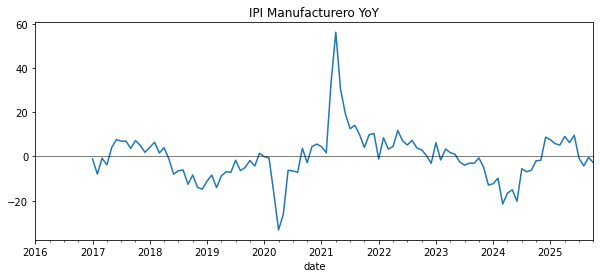

In [54]:
import matplotlib.pyplot as plt

df.set_index("date")["ipi_yoy"].plot(figsize=(10,4))
plt.title("IPI Manufacturero YoY")
plt.axhline(0, color="black", linewidth=0.5)
plt.show()


In [55]:
df["ipi_yoy"].notna().sum() > 0


True

In [56]:
df.to_csv("../data/ipi_yoy.csv", index=False)    # en IPI